# INTRODUCTION

1. [Load and Check Data](#1)

2. [Variable Description](#2)

   2.1. [Categorical Variable](#3)
   
   2.2. [Numerical Variable](#4)
   
3. [Basic Data Analysis](#5)
    * Experience Level - Salary in USD
    * Employment Type -  Salary in USD
    * Work Year - Salary in USD
    
4. [Visualization](#6)

    4.1 [Univariate Visualization](#7)
      * Company Location
      * Employee Residence 
      * Job Titles
      * Experience Level
      
   4.2 [Multivariate Visualization](#8)
      * Job Title - Employment Type
      * Job Title - Salary in USD

   
        
        

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
from wordcloud import WordCloud
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


<a id = "1"></a><br>
### Load and Check Data

In [2]:
#read data
dataset = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")

In [3]:
dataset.head() # first 5 data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
dataset.drop("Unnamed: 0",inplace = True,axis = 1) # drop Unnamed column because we have it already

In [5]:
#information about dataset. Type of data, Non-Null data and names of columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
dataset.describe() 

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


<a id = "2"></a><br>
### Variable Description
 * work_year: Data Science Jobs in 2020,2021,2022
 * experience_level: Companies requests for data scientist experience level 
     * EN (Entry-level) / Junior
     * MI (Mid-level) / Intermediate
     * SE (Senior-level) / Expert
     * EX (Expert-level) / Director
 * employment_type: Companies requests for type of working
     * PT (Part-time)
     * FT (Full-time)
     * CT (Contact)
     * FL (Freelance)
     
 * jop_title: Jobs titles
 * salary: Total gross salary 
 * salary_currency: The currencies of salary paid as an ISO 4217 currency code.
 * salary_in_usd: Salary: Total salary in USD
 * employee_residence: Employee's primary country of residence in during the work year as ISO 3166 country code.
 * remote_ratio: The overall amount of work done remotely
     * 0 (No remote)
     * 50 (Partially remote)
     * 100 (Fully remote)
 * company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code
 * company_size: The average number of people that work for company in year


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


* int64(4): work_year,salary,salary_in_usd,remote_ratio
* object(7): experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size

<a id = "3"></a><br>
### Categorical Variable
* experience_level
* employment_type
* job_title
* salary_currency
* employee_residence
* company_location
* company_size

In [8]:
def get_variable(variable):
    
    """
    input: variable
    
    output: barplot or variable counts
    
    """
    
    #get variable
    
    var = dataset[variable]
    
    varValue = var.value_counts()
    
    
    #visualization
    
    plt.figure(figsize = (20,3))
    plt.bar(varValue.index,varValue)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    

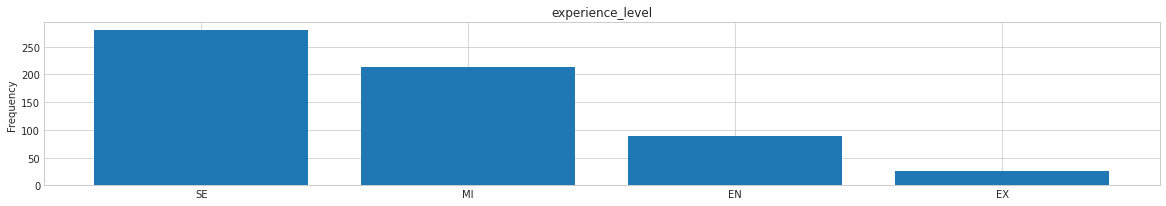

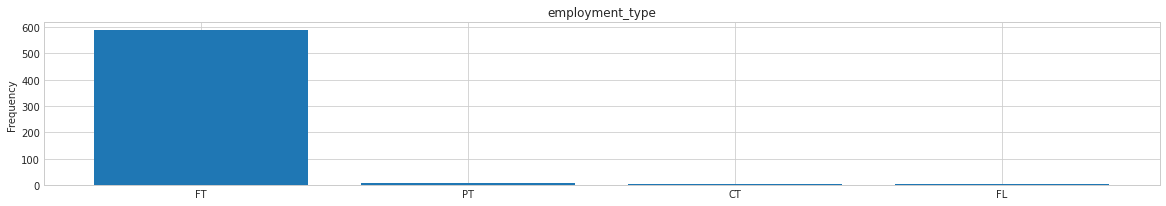

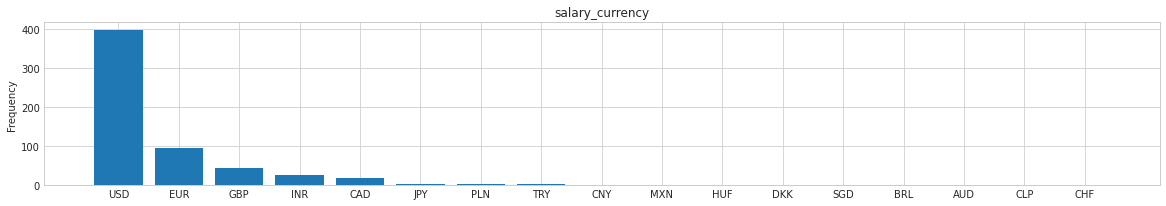

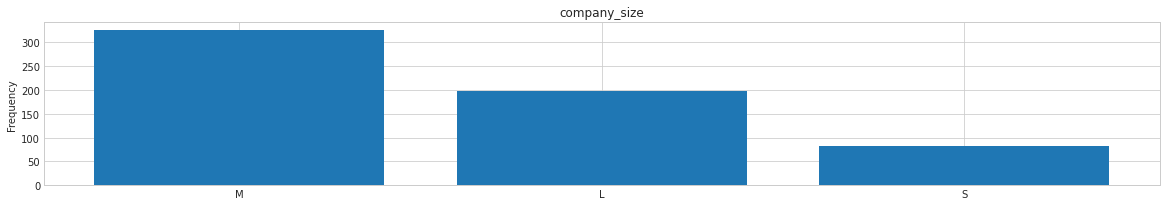

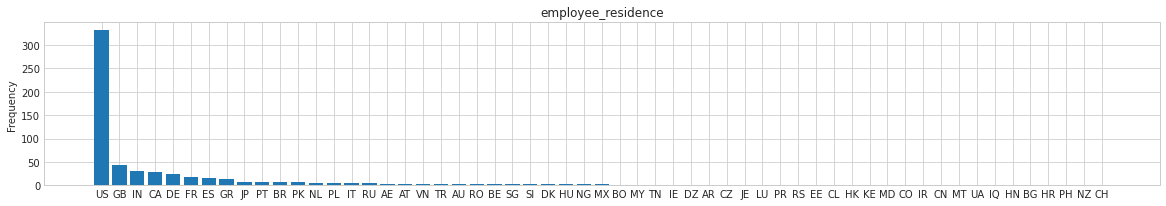

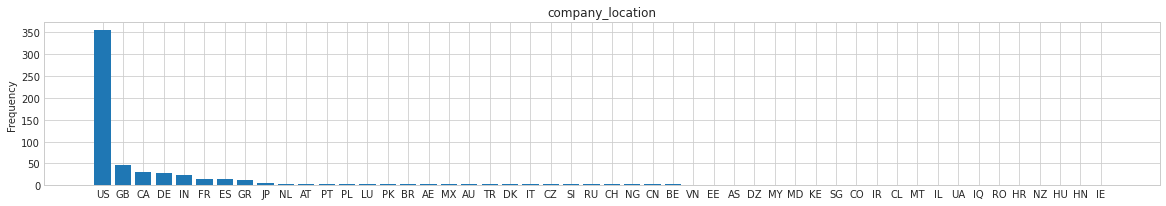

In [9]:
# I dont plot job_title object because there are a lot of data about job title. ın further analysis, ı will plot it with better understanding
category = ["experience_level","employment_type","salary_currency","company_size","employee_residence","company_location"]
for i in category:
    get_variable(i)

<a id = "4"></a><br>
### Numeric Variable

* salary
* salary_in_usd
* work_year
* remote_ratio

In [10]:
def get_numeric(variable):
    
    var = dataset[variable] 
    plt.figure(figsize = (20,3))
    
    plt.hist(var,bins= 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution histogram".format(variable))
    plt.show()    

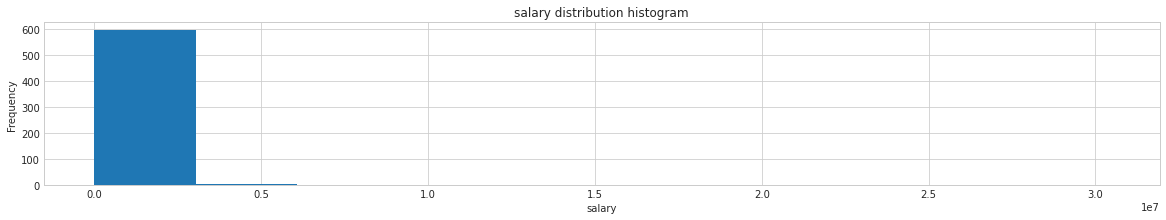

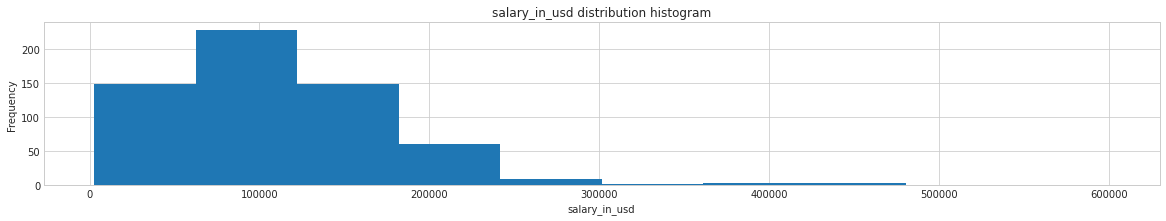

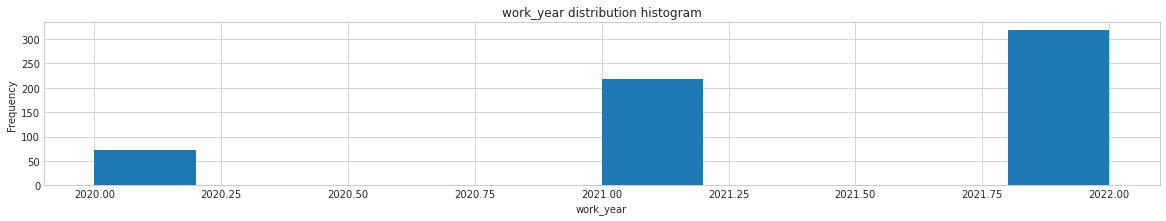

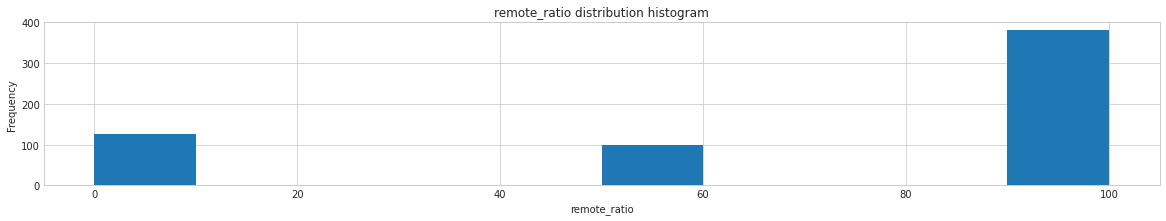

In [11]:
category = ["salary","salary_in_usd","work_year","remote_ratio"]
for i in category:
    get_numeric(i)

<a id = "5"></a><br>
### Data Analysis

##### Experience Level - Salary in USD

In [12]:
dataset[["experience_level","salary_in_usd"]].groupby(["experience_level"],as_index = False).mean().sort_values(by = "salary_in_usd",ascending = False).reset_index()

,index,experience_level,salary_in_usd
0,1,EX,199392.038462
1,3,SE,138617.292857
2,2,MI,87996.056338
3,0,EN,61643.318182


* Expert level programmer takes more salary than others.
* it goes Expert-Senior-Mıd Level- Entry Level

##### Employment Type -  Salary in USD

In [13]:
dataset[["employment_type","salary_in_usd"]].groupby(["employment_type"],as_index = False).mean().sort_values(by="salary_in_usd",ascending=False).reset_index()

,index,employment_type,salary_in_usd
0,0,CT,184575.000000
1,2,FT,113468.073129
2,1,FL,48000.000000
3,3,PT,33070.500000


* CT(Contract) employment type earns much more than other types. 

##### Work Year - Salary in USD

In [14]:
dataset[["work_year","salary_in_usd"]].groupby(["work_year"],as_index = False).mean().sort_values(by = "salary_in_usd",ascending = False).reset_index()

,index,work_year,salary_in_usd
0,2,2022,124522.006289
1,1,2021,99853.792627
2,0,2020,95813.000000


* In 2022 Software Engineers earn much more than other years 

<a id = "6"></a><br>
# Visualization

<a id = "7"></a><br>
# Univariate Visualization

### Company Location

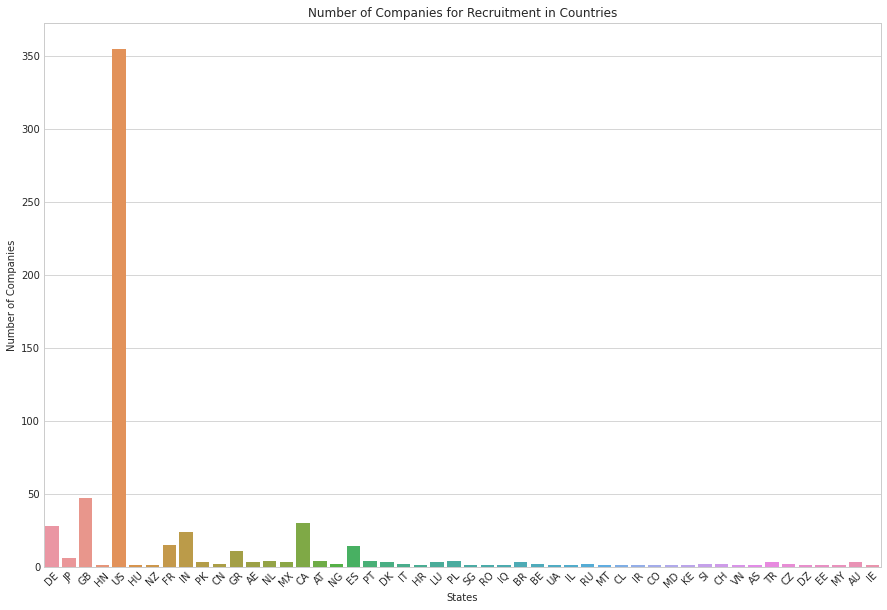

In [15]:
area_list = list(dataset["company_location"].unique())
number_of_companies = []
for i in area_list:
    x  = len(dataset[dataset["company_location"] == i])
    number_of_companies.append(x)
    
data = pd.DataFrame({"area_list":area_list,"number_of_companies":number_of_companies})

plt.figure(figsize = [15,10])

sns.barplot(x = area_list,y = number_of_companies)

plt.xticks(rotation = 45)
plt.xlabel("States")
plt.ylabel("Number of Companies")
plt.title("Number of Companies for Recruitment in Countries")
plt.show()


### Employee Residence

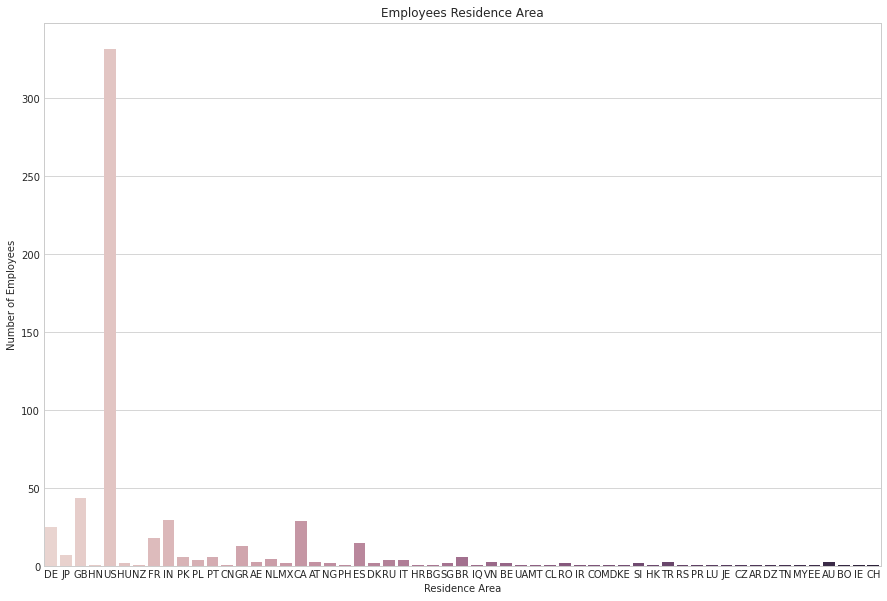

In [16]:
employee_residence_area = list(dataset["employee_residence"].unique())

employee_residence = []

for i in employee_residence_area:
    x = len(dataset[dataset["employee_residence"] == i])
    employee_residence.append(x)
    
plt.figure(figsize =(15,10))

sns.barplot(x = employee_residence_area,y = employee_residence,palette = sns.cubehelix_palette(len(employee_residence_area)))
plt.xlabel("Residence Area")
plt.ylabel("Number of Employees")
plt.title("Employees Residence Area")
plt.show()

### Job Titles

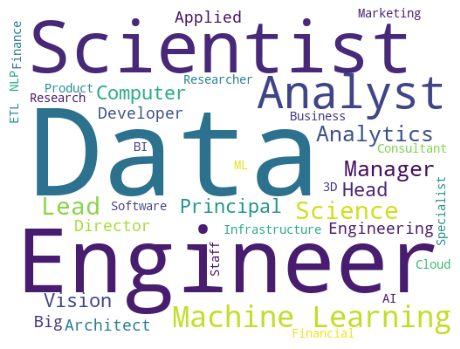

In [17]:
x = dataset["job_title"].unique()
plt.subplots(figsize= (8,8))

wordcloud = WordCloud(
                        background_color = "white",
                        width = 512,
                        height = 384).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")     
             
plt.show()

### Experience Level

In [18]:
data = dataset["experience_level"].unique()

pie_list = []
labels = dataset["experience_level"].unique()

for i in data:
    
    x = len(dataset[dataset["experience_level"] == i])
    
    pie_list.append(x)
    
fig = {
    "data" : [
    {
        "values" : pie_list,
        "labels": labels,
        "domain" : {"x" : [0,.5]},
        "name" : "number of exlevel rates",
        "hoverinfo":"label + percent + name",
        "hole" : 0.3,
        "type" : "pie"
    },],
"layout" : {
    
    "title" : "Experiment Level Rates",
    
    "annotations" : [
        
        
        { "font" :  {"size" : 15},
         "showarrow" : False,
         "text" : "Experiment level ratio",
         "x" : 0.21,
         "y": 1.1
        },
    ]        
        }
}

iplot(fig)

<a id = "8"></a><br>
## Multivariate Visualization

### Job Title - Employment Type

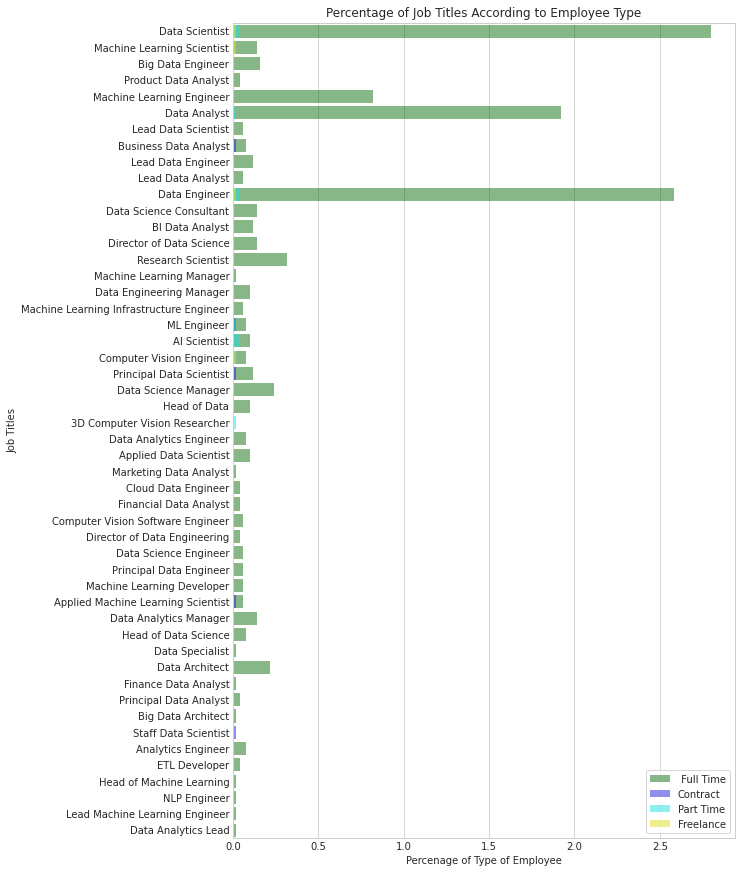

In [19]:
job_title = dataset.job_title.unique()

ft_list = []
ct_list = []
pt_list = []
fl_list = []

for i in job_title:

    data = dataset[dataset["job_title"]  == i]["employment_type"]
    number_of_ft = 0
    number_of_ct = 0
    number_of_pt = 0
    number_of_fl = 0
    total = 0

    for j in data:
        if j == "FT":
            number_of_ft += 1
        elif j == "CT":
            number_of_ct += 1
        elif j == "PT":
            number_of_pt += 1
        elif j == "FL":
            number_of_fl += 1
    ft_list.append(number_of_ft)
    ct_list.append(number_of_ct)
    pt_list.append(number_of_pt)
    fl_list.append(number_of_fl)
    
dict = {"Job Titles": job_title,"Number of FT": ft_list,"Number of CT":ct_list,"Number of PT": pt_list,"Number of FL": fl_list}
df = pd.DataFrame(dict)
share_ft = []
share_ct = []
share_pt = []
share_fl = []
for i in job_title:
    
    x = df[df["Job Titles"] == i ]
    
    share_ft_ratio = sum(x["Number of FT"])/len(df)
    share_ct_ratio = sum(x["Number of CT"])/len(df)
    share_pt_ratio = sum(x["Number of PT"])/len(df)
    share_fl_ratio = sum(x["Number of FL"])/len(df)

    share_ft.append(share_ft_ratio)
    share_ct.append(share_ct_ratio)
    share_pt.append(share_pt_ratio)
    share_fl.append(share_fl_ratio)

f,ax = plt.subplots(figsize = (9,15))

sns.barplot(x = share_ft, y = job_title, color="green",alpha = 0.5,label = " Full Time")
sns.barplot(x = share_ct, y = job_title, color="blue",alpha = 0.5,label = "Contract")
sns.barplot(x = share_pt, y = job_title, color="cyan",alpha = 0.5,label = "Part Time")
sns.barplot(x = share_fl, y = job_title, color="yellow",alpha = 0.5,label = "Freelance")

ax.legend(loc = "lower right",frameon = True) #showing legends
ax.set(xlabel = "Percenage of Type of Employee",ylabel = "Job Titles",title = "Percentage of Job Titles According to Employee Type")

plt.show()
 

### Job Title and Salary in USD

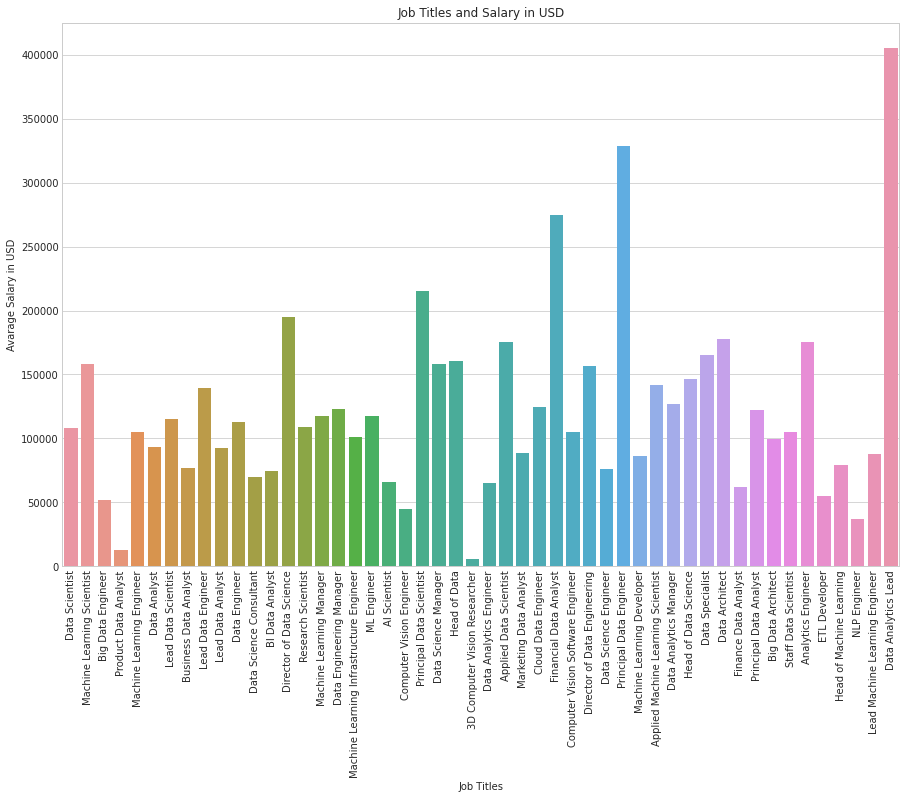

In [20]:
data = dataset["job_title"].unique()

hist_list = []
for i in data:
    x = dataset[dataset["job_title"] == i]["salary_in_usd"].mean()
    
    hist_list.append(x)

dataframe = pd.DataFrame({"names": data,"values":hist_list})


plt.figure(figsize = [15,10])

sns.barplot(x = data,y = hist_list)

plt.xticks(rotation = 90)
plt.xlabel("Job Titles")
plt.ylabel("Avarage Salary in USD")
plt.title("Job Titles and Salary in USD")
plt.show()

